In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [2]:
# Ejemplo Articulo ----------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

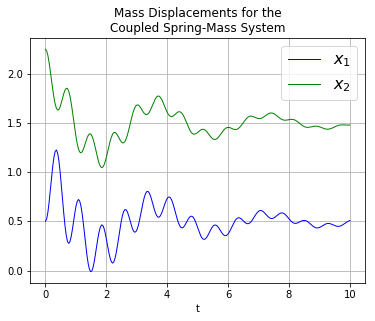

In [3]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('two_springs.png', dpi=100)

In [4]:
def vectorfieldNL(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,u1,u2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, u1, u2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2) + u2 * (x1 - x2) ** 3 + u1 * x1 ** 3) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + u2 * (x2 - x1) ** 3) / m2]
    return f

In [5]:
# Ejemplo 3.1 ----------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0
b2 = 0
# Factores de no linearidad
u1 = -(1/6)
u2 = -0.1

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1
y1 = 0
x2 = -0.5
y2 = 0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfieldNL, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo3-1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

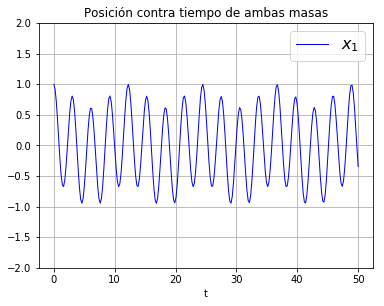

In [6]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo3-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plt.ylim(-2,2)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición contra tiempo de ambas masas')
savefig('ejemplo3-1.png', dpi=100)

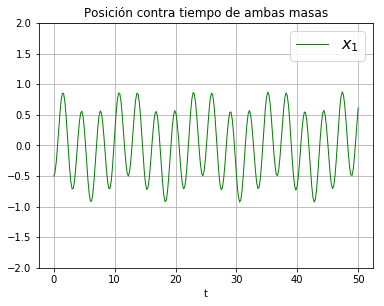

In [7]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo3-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x2, 'g', linewidth=lw)
plt.ylim(-2,2)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición contra tiempo de ambas masas')
savefig('ejemplo3-1.png', dpi=100)

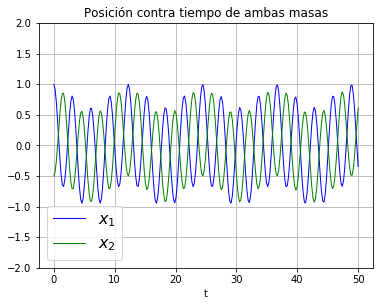

In [8]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo3-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
plt.ylim(-2,2)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición contra tiempo de ambas masas')
savefig('ejemplo3-1.png', dpi=100)

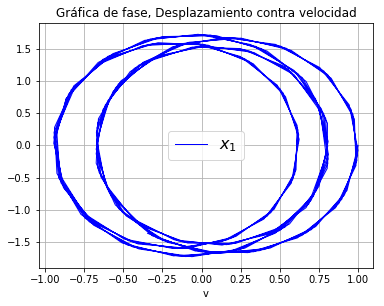

In [9]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo3-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo3-1-1.png', dpi=100)

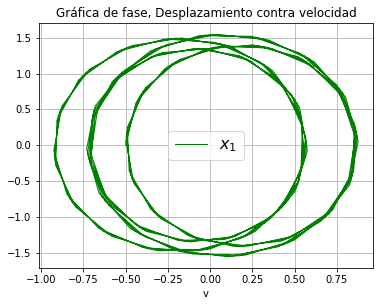

In [10]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo3-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo3-1-2.png', dpi=100)

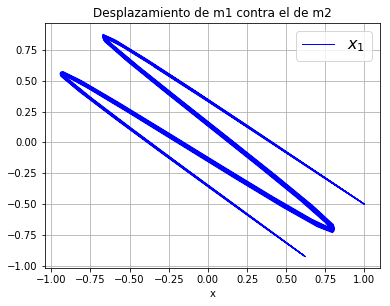

In [11]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo3-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de m1 contra el de m2')
savefig('recta3-1.png', dpi=100)

In [12]:
# Ejemplo 3.2 ----------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0
b2 = 0
# Factores de no linearidad
u1 = -(1/6)
u2 = -0.1

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.5
y1 = 0.5
x2 = 3.001
y2 = 5.9

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0
numpoints = 1000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfieldNL, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo3-2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

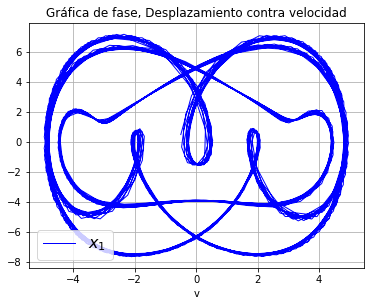

In [13]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo3-2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo3-2-1.png', dpi=100)

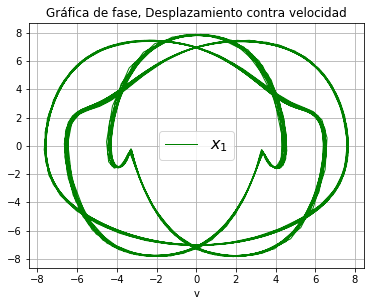

In [14]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo3-2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo3-2-2.png', dpi=100)

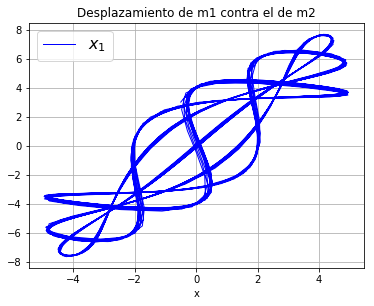

In [15]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo3-2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de m1 contra el de m2')
savefig('recta3-2.png', dpi=100)

In [16]:
# Ejemplo 3.3 ----------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0
b2 = 0
# Factores de no linearidad
u1 = -(1/6)
u2 = -0.1

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.6
y1 = 0.5
x2 = 3.001
y2 = 5.9

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0
numpoints = 2000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfieldNL, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo3-3.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

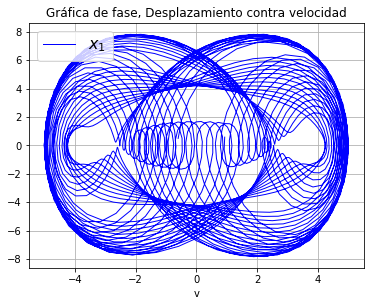

In [17]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo3-3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo3-3-1.png', dpi=100)

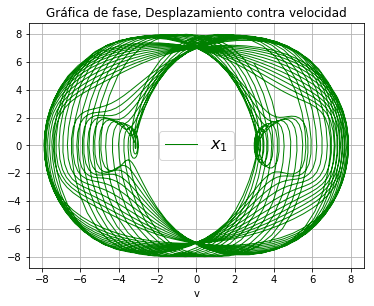

In [18]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo3-3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x2, y2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo3-3-2.png', dpi=100)

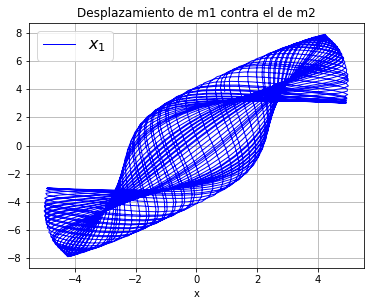

In [19]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo3-3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de m1 contra el de m2')
savefig('recta3-3.png', dpi=100)

In [20]:
import numpy as np
def vectorfieldNLF(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,u1,u2,F1,F2,h1,h2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, u1, u2, F1, F2, h1, h2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2) + u2 * (x1 - x2) ** 3 + u1 * x1 ** 3 + F1 * (np.cos(h1 * t))) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + u2 * (x2 - x1) ** 3 + F2 * (np.cos(h2 * t))) / m2]
    return f

In [21]:
# Ejemplo 4.1 ----------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.0
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0.1
b2 = 0.2
# Factores de no linearidad
u1 = (1/6)
u2 = 0.1
# Magnitud de fuerza
F1 = (1/3)
F2 = 0.2
# Frecuencia angular de fuerza
h1 = 1
h2 = 0.6

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0
x2 = 0.1
y2 = 0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 170.0
numpoints = 1500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2, F1, F2, h1, h2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfieldNLF, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo4-1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

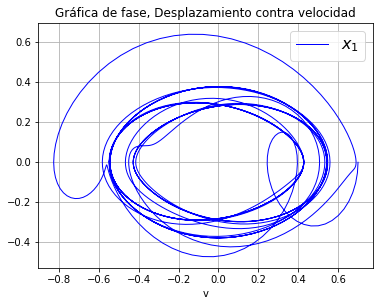

In [22]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo4-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo4-1-1.png', dpi=100)

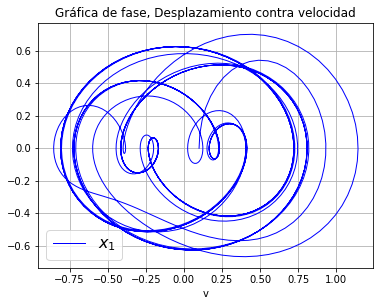

In [23]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo4-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x2, y2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase, Desplazamiento contra velocidad')
savefig('circulo4-1-1.png', dpi=100)

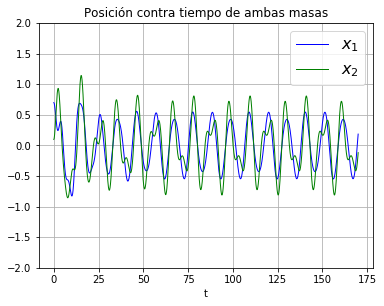

In [24]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo4-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
plt.ylim(-2,2)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición contra tiempo de ambas masas')
savefig('ejemplo4-1.png', dpi=100)

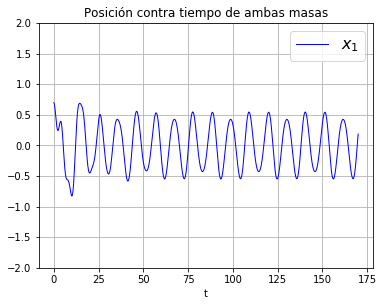

In [25]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties

%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo4-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plt.ylim(-2,2)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición contra tiempo de ambas masas')
savefig('ejemplo4-1-1.png', dpi=100)

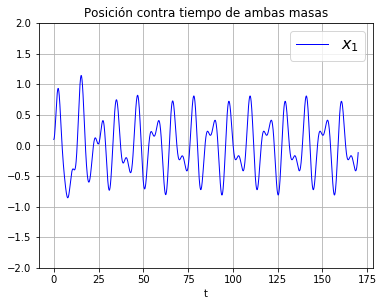

In [27]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo4-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x2, 'b', linewidth=lw)
plt.ylim(-2,2)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición contra tiempo de ambas masas')
savefig('ejemplo4-1-2.png', dpi=100)

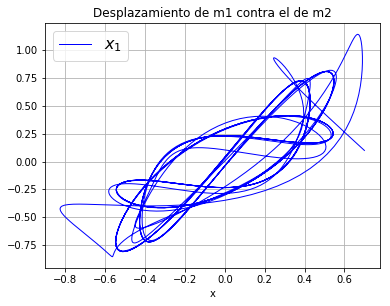

In [28]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo4-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de m1 contra el de m2')
savefig('recta4-1.png', dpi=100)

In [31]:
# Ejemplo 4.1 limit ----------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.0
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0.1
b2 = 0.2
# Factores de no linearidad
u1 = (1/6)
u2 = 0.1
# Magnitud de fuerza
F1 = (1/3)
F2 = 0.2
# Frecuencia angular de fuerza
h1 = 1
h2 = 0.6

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0
x2 = 0.1
y2 = 0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 1000.0
numpoints = 50000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, u1, u2, F1, F2, h1, h2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfieldNLF, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo4-1l.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

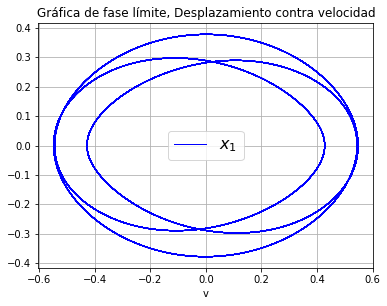

In [32]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo4-1l.dat', unpack=True, skiprows=5000)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase límite, Desplazamiento contra velocidad')
savefig('circulo4-1-1l.png', dpi=100)

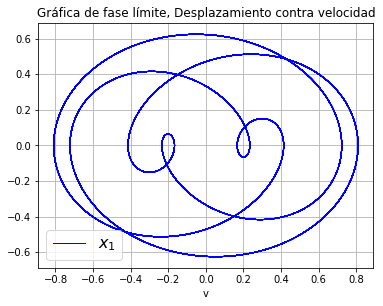

In [33]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo4-1l.dat', unpack=True, skiprows=5000)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x2, y2, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de fase límite, Desplazamiento contra velocidad')
savefig('circulo4-1-2l.png', dpi=100)